# Análise de Gastos Mensais

## 03 - Análise exploratória
Neste notebook será realizada a análise exploratória dos dados de gastos mensais, com o objetivo de compreender a distribuição dos valores, identificar padrões de consumo e observar possíveis variações ao longo do tempo. Serão utilizadas tabelas resumo e visualizações gráficas para apoiar a interpretação inicial dos dados e preparar o terreno para a aplicação das técnicas de estatística descritiva nos próximos notebooks.


### 3.1 Importação das bibliotecas

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Além do pandas, outras bibliotecas são utilizadas para apoiar a análise exploratória dos dados:

- **NumPy**: biblioteca voltada para computação numérica, utilizada para realizar operações matemáticas e apoiar cálculos estatísticos ao longo da análise.

- **Matplotlib**: biblioteca base para criação de visualizações gráficas em Python. É utilizada para gerar gráficos simples, como histogramas e gráficos de barras, permitindo uma análise visual da distribuição dos dados.

- **Seaborn**: biblioteca de visualização estatística construída sobre o Matplotlib. Facilita a criação de gráficos mais elaborados e informativos, sendo especialmente útil para explorar distribuições e padrões nos dados.

### 3.2 Leitura e visualização do dataset


In [163]:
df = pd.read_csv("../data/raw/gastos.csv")
df.head()

,mes,categoria,valor_gasto,quantidade_compras,forma_pagamento,tipo_gasto
0,Janeiro,Aluguel,1000.00,1,Pix,Fixo
1,Janeiro,Internet,99.90,1,Débito,Fixo
2,Janeiro,Telefone,59.99,1,Débito,Fixo
3,Janeiro,Mercado,557.89,4,Débito,Variável
4,Janeiro,Alimentacao,347.13,13,Credito,Variável


### 3.3 Evolução dos gastos total ao longo dos meses

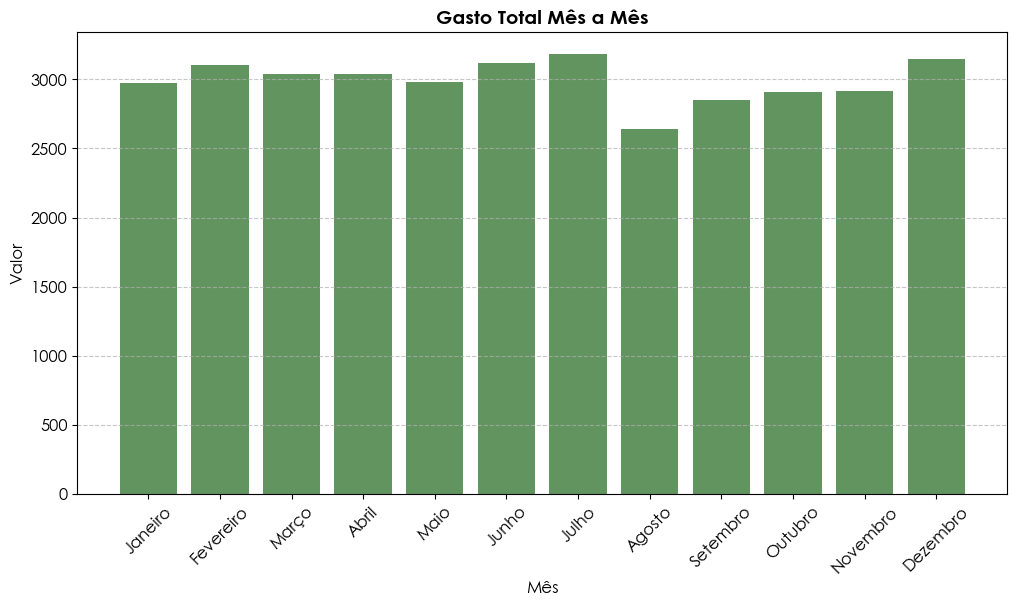

In [176]:
ordem_meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
gasto_mensal = df.groupby('mes', as_index=False).agg(total_gasto=('valor_gasto', 'sum'))
gasto_mensal['mes'] = pd.Categorical(gasto_mensal['mes'],categories=ordem_meses,ordered=True)
gasto_mensal = gasto_mensal.sort_values('mes').reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.bar(gasto_mensal['mes'], gasto_mensal['total_gasto'], color='#629460')

plt.xlabel('Mês', fontsize=12, fontname='Century Gothic')
plt.ylabel('Valor', fontsize=12, fontname='Century Gothic')
plt.title('Gasto Total Mês a Mês', fontsize=14, fontweight="bold", fontname='Century Gothic')

plt.xticks(rotation=45, fontsize=12, fontname='Century Gothic')
plt.yticks(fontsize=12, fontname='Century Gothic')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.4 Distribuição dos gastos por categoria no ano

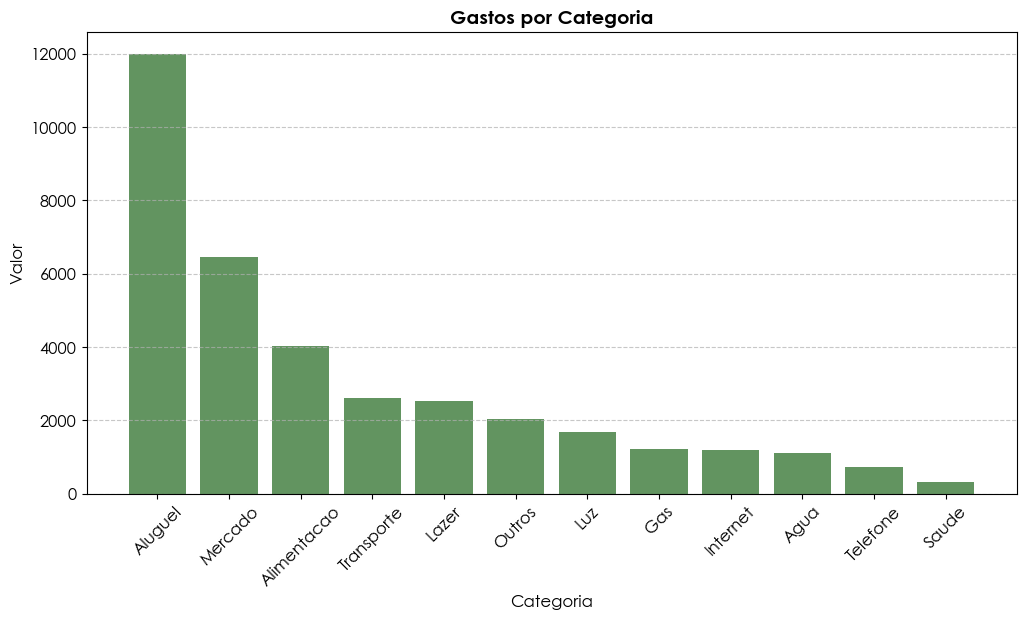

In [178]:
gasto_categoria = df.groupby('categoria', as_index=False)['valor_gasto'].sum()
gasto_categoria['percentual'] = (gasto_categoria['valor_gasto'] / gasto_categoria['valor_gasto'].sum()) * 100
gasto_categoria = gasto_categoria.sort_values('valor_gasto', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.bar(gasto_categoria['categoria'], gasto_categoria['valor_gasto'], color='#629460')

plt.xlabel('Categoria', fontsize=12, fontname='Century Gothic')
plt.ylabel('Valor', fontsize=12, fontname='Century Gothic')
plt.title('Gastos por Categoria', fontsize=14, fontweight="bold", fontname='Century Gothic')

plt.xticks(rotation=45, fontsize=12, fontname='Century Gothic')
plt.yticks(fontsize=12, fontname='Century Gothic')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.4 Distribuição dos gastos fixos e variáveis

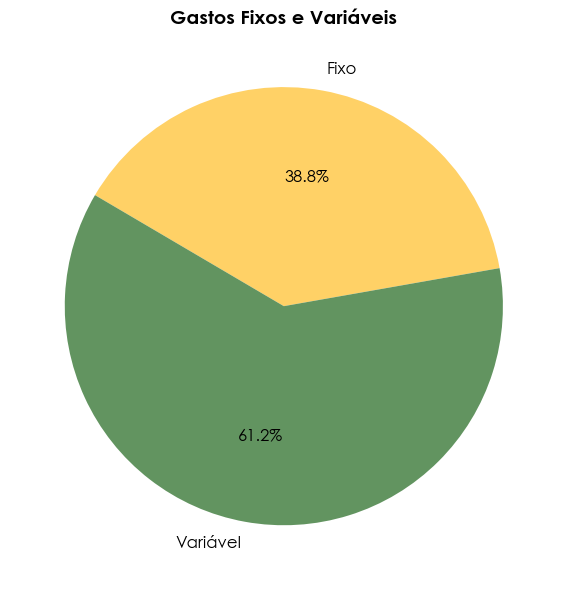

In [190]:
gasto_tipo = df.groupby('tipo_gasto', as_index=False)['valor_gasto'].sum()
gasto_tipo['percentual'] = (gasto_tipo['valor_gasto'] / gasto_tipo['valor_gasto'].sum()) * 100

plt.figure(figsize=(6,6))
plt.pie(
    gasto_tipo['valor_gasto'], 
    labels=gasto_tipo['tipo_gasto'], 
    autopct='%1.1f%%', 
    startangle=10,
    colors=['#FFD166','#629460'],
    textprops={'fontsize':12, 'fontname':'Century Gothic'} 
)
plt.title('Gastos Fixos e Variáveis', fontsize=14, fontweight="bold", fontname='Century Gothic')
plt.tight_layout()
plt.show()
